# Ejercicio de aprendizaje no supervisado

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [31]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [32]:
# lectura de datos en Python y lo cargamos en la variable Data

Data = pd.read_csv('C:/Users/nbarr/Downloads/Mall_Customers.csv')


In [33]:
# Realizamos lectura de los Datos para el análisis exploratorio

Data.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [34]:
# Descripción de los datos
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

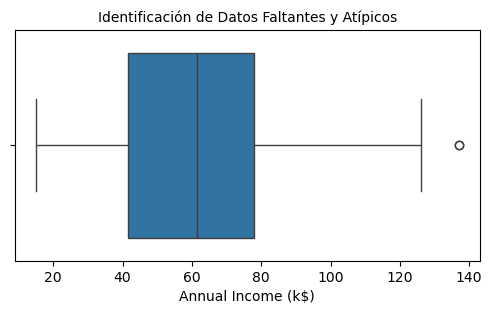

In [35]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

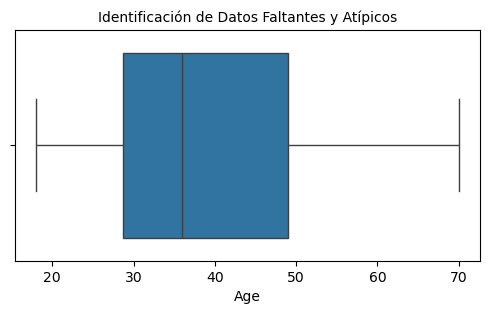

In [36]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

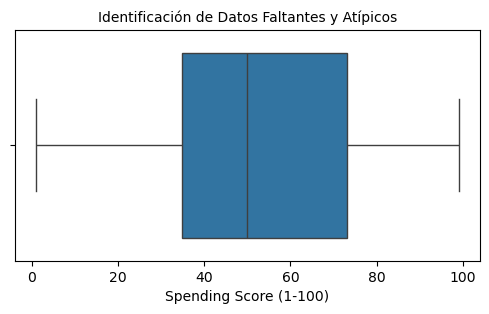

In [37]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  

In [38]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Age(Edad): ",Data['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual Income(Ingresos Anuales): ",Data['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (Puntación de gasto): ",Data['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Age(Edad):  0
Cantidad de Registros con cero en Annual Income(Ingresos Anuales):  0
Cantidad de Registros con cero en Spending Score (Puntación de gasto):  0


In [39]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Data['Annual Income (k$)']=Data['Annual Income (k$)'].replace(0,Data['Annual Income (k$)'].mean())

In [40]:
#Conteo de Datos Atípicos

nivel_minimo=1
nivel_maximo=100
Total_Atipicos=((Data['Spending Score (1-100)']<nivel_minimo)|(Data['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [41]:
#Conteo de Datos Atípicos

nivel_minimo=15
nivel_maximo=130
Total_Atipicos=((Data['Annual Income (k$)']<nivel_minimo)|(Data['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [42]:
# Filtra Datos Atípicos

Data=Data[(Data['Annual Income (k$)']<nivel_maximo)&(Data['Annual Income (k$)']>nivel_minimo)]

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

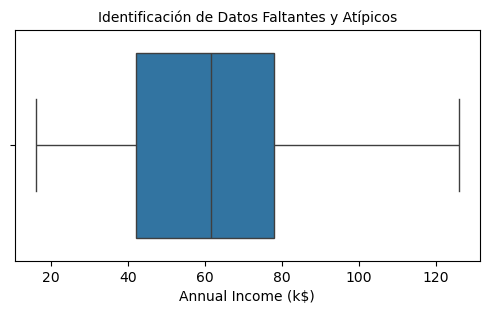

In [43]:
#Identificación que los Datos Faltantes y Atípicos hayan sido filtrados

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [44]:
#Conteo de Datos Atípicos

nivel_minimo=18
nivel_maximo=80
Total_Atipicos=((Data['Age']<nivel_minimo)|(Data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [45]:
#Revisión del tipo de datos y datos faltantes

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 2 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              196 non-null    int64 
 1   Gender                  196 non-null    object
 2   Age                     196 non-null    int64 
 3   Annual Income (k$)      196 non-null    int64 
 4   Spending Score (1-100)  196 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.2+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

Caracteristicas de interes para e agrupamiento
 - Spending Score (Puntuación de gasto)
 - Annual Income (Salario Anual)
 - Age (Edad)
   

In [46]:
# Filtrar columnas del modelo 

Data = Data[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [47]:
# Revisión de los datos de las variables objetivo

Data.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72
10,67,19,14
11,35,19,99


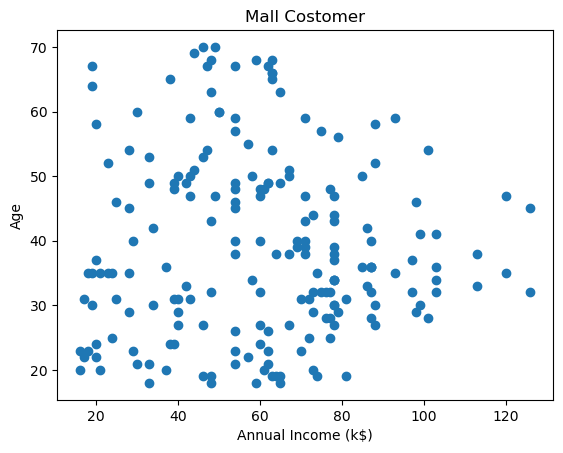

In [48]:
# Grafica antes del agrupamiento

plt.scatter(Data['Annual Income (k$)'], Data['Age'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Mall Costomer')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros. 

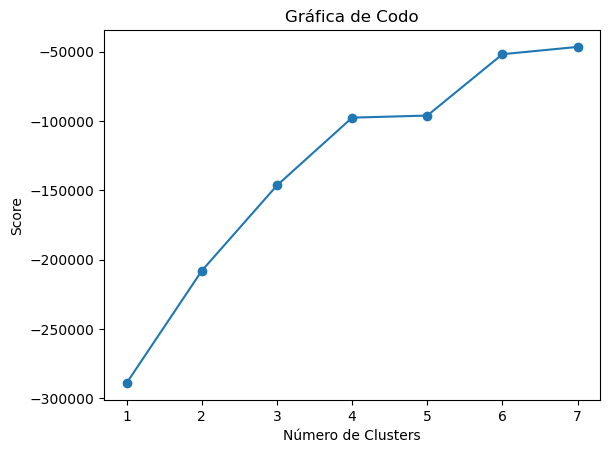

In [49]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Data).score(Data) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [50]:
# Generación del modelo de Agrupamiento del modelo con K=6 (Es decir haremos 6 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(Data)

KMeans(n_clusters=6, random_state=0)

In [51]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Data["Grupo"] = Modelo.labels_ 
print (Data)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
2     20                  16                       6      2
3     23                  16                      77      5
4     31                  17                      40      2
5     22                  17                      76      5
6     35                  18                       6      2
..   ...                 ...                     ...    ...
193   38                 113                      91      1
194   47                 120                      16      3
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1

[196 rows x 4 columns]


In [52]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 6 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Data)

KMeans(n_clusters=5, random_state=0)

In [63]:
#Se agrega la columna grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Data["grupo"] = Modelo.labels_ 
print (Data)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo  grupo  GRUPO
2     20                  16                       6      2      0      0
3     23                  16                      77      5      2      2
4     31                  17                      40      2      2      2
5     22                  17                      76      5      2      2
6     35                  18                       6      2      0      0
..   ...                 ...                     ...    ...    ...    ...
193   38                 113                      91      1      1      1
194   47                 120                      16      3      3      3
195   35                 120                      79      1      1      1
196   45                 126                      28      3      3      3
197   32                 126                      74      1      1      1

[196 rows x 6 columns]


In [54]:
# Generación del modelo de Agrupamiento del modelo con K=4 (Es decir haremos 6 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=4, random_state=0)
Modelo.fit(Data)

KMeans(n_clusters=4, random_state=0)

In [55]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Data["GRUPO"] = Modelo.labels_ 
print (Data)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo  grupo  GRUPO
2     20                  16                       6      2      0      0
3     23                  16                      77      5      2      2
4     31                  17                      40      2      2      2
5     22                  17                      76      5      2      2
6     35                  18                       6      2      0      0
..   ...                 ...                     ...    ...    ...    ...
193   38                 113                      91      1      1      1
194   47                 120                      16      3      3      3
195   35                 120                      79      1      1      1
196   45                 126                      28      3      3      3
197   32                 126                      74      1      1      1

[196 rows x 6 columns]


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 

In [59]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Data)
X = Data.drop('Grupo', axis=1)
clusters = Data['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score],
    ["Inercia", inertia_value]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         196         |
|  Coeficiente Silhouette  | 0.37896307133111035 |
| Indice Calinski Harabasz |  110.8675356928237  |
|  Indice Davies Bouldin   | 1.1141452674877697  |
|         Inercia          |  97578.76337847611  |
+--------------------------+---------------------+


In [61]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Data)
X = Data.drop('grupo', axis=1)
clusters = Data['grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score],
    ["Inercia", inertia_value]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         196         |
|  Coeficiente Silhouette  | 0.35882020099949796 |
| Indice Calinski Harabasz | 102.17681337578657  |
|  Indice Davies Bouldin   | 1.1061027855757035  |
|         Inercia          |  97578.76337847611  |
+--------------------------+---------------------+


In [62]:
# Desempeño del modelo con el Coeficiente de Silhouette, el Índice de Calinski-Harabasz, el índice de Davies-Bouldin y la Inercia

# Preparación de la métrica de la columna Grupo
Observaciones = len(Data)
X = Data.drop('GRUPO', axis=1)
clusters = Data['GRUPO']

# Reentrenar modelo KMeans para acceder a la inercia (usa el mismo número de clústeres que antes)
from sklearn.cluster import KMeans
n_clusters = len(set(clusters))  # cuenta los clústeres únicos
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(X)
inertia_value = kmeans_model.inertia_

# Se calculan las demás métricas
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score],
    ["Inercia", inertia_value]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        196         |
|  Coeficiente Silhouette  | 0.3986227882374553 |
| Indice Calinski Harabasz | 125.61269348528657 |
|  Indice Davies Bouldin   | 1.039307628568109  |
|         Inercia          | 97578.76337847611  |
+--------------------------+--------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo 

In [ ]:
# Centroides
centroides_6 = kmeans_6.cluster_centers_
centroides_5 = kmeans_5.cluster_centers_
centroides_4 = kmeans_4.cluster_centers_

# Mostrar centroides
print("Centroides para 6 clusters:\n", centroides_6)
print("\nCentroides para 5 clusters:\n", centroides_5)
print("\nCentroides para 4 clusters:\n", centroides_4)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X['Annual Income (k$)'], X['Age'], c=Data['Grupo'], cmap='viridis', alpha=0.6)
plt.scatter(centroides_6[:, 0], centroides_6[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Clusters con 6 grupos y sus centroides')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X['Annual Income (k$)'], X['Age'], c=Data['grupo'], cmap='viridis', alpha=0.6)
plt.scatter(centroides_5[:, 0], centroides_5[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Clusters con 5 grupos y sus centroides')
plt.legend()
plt.show()

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Age'], c=Data['GRUPO'], cmap='viridis', alpha=0.6)
plt.scatter(centroides_4[:, 0], centroides_4[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Clusters con 4 grupos y sus centroides')
plt.legend()
plt.show()


In [ ]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

## 7. Interpretar, analizar y documentar los resultados obtenidosDel desempeño del modelo se puede describir:



1. Coeficiente Silhouette
Cuantifica la calidad de separación entre los grupos (cuanto más cerca de 1, mejor).
El valor más alto lo tiene 4 clusters (0.3986), lo que sugiere mejor separación y cohesión.

2. Índice de Calinski-Harabasz
Evalúa la dispersión entre clusters y dentro de ellos. Valores más altos indican mejor partición.
Mejor resultado con 4 clusters (125.61), indicando mayor separación entre los grupos.

3. Índice Davies-Bouldin
Cuantifica la similitud entre clusters (valores menores son mejores).
4 clusters nuevamente tiene el mejor valor (1.0399) → menos solapamiento entre grupos.

4. Inercia (Suma de errores dentro de los clusters)
Se mantiene idéntica en los tres modelos